In [3]:
from fhd import *
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

In [33]:
# fname_behavioral = '../data/behavioral/2019_09_24/random_target_backstep_093603.fhd'
# fname_behavioral = '../data/behavioral/random_target_backstep_155445.fhd'
# fname_behavioral = '../data/behavioral/random_corrective_saccades_175901.fhd'
fname_behavioral = '../data/behavioral/random_target_stepback/2019_11_12/random_target_backstep_084641.fhd'
# fname_OE_x = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/100_ADC2.continuous'
# fname_OE_y = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/100_ADC1.continuous'
# messages_fname = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/messages.events'

In [34]:
fhd_content = load(fname_behavioral)

In [7]:
np.squeeze(fhd_content['state_value']).shape


(1339255,)

In [47]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<IPython.core.display.Javascript object>


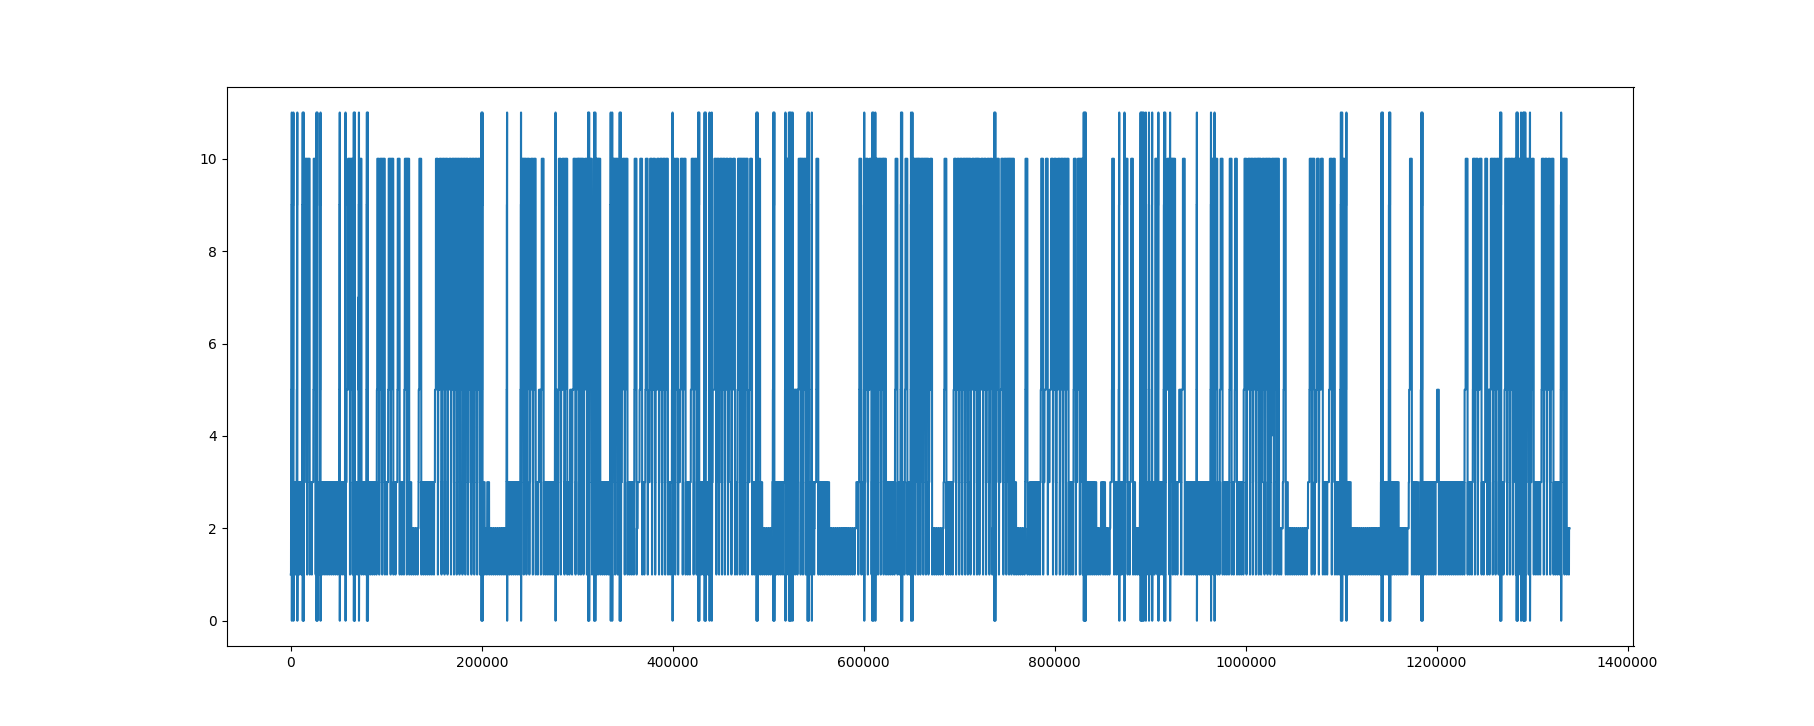

In [8]:
plt.figure()
plt.plot(np.squeeze(fhd_content['state_value']))

In [9]:
fhd_content['trials'][0]

{'trial_start_time': array([4675.08806398]),
 'target_width': array([0.46606201]),
 'target_height': array([0.48378435]),
 'start_x': array([0.]),
 'start_y': array([0.]),
 'cue_x': array([-4.2426405]),
 'cue_y': array([-4.2426405]),
 'iss_x': array([2.47487378]),
 'iss_y': array([2.47487378]),
 'end_x': array([-1.76776695]),
 'end_y': array([-1.76776695]),
 'fixation_time': array([0.2]),
 'punishment_time': array([2.]),
 'iti': array([0.2]),
 'target_dwell_time': array([0.085]),
 'state_start_time_str_target_pursuit': array([[4675.0874]], dtype=float32),
 'state_start_time_str_target_present': array([[4675.2915]], dtype=float32),
 'state_start_time_str_target_fixation': array([[4675.2915]], dtype=float32),
 'state_start_time_cue_target_present': array([[4675.495]], dtype=float32),
 'state_start_time_detect_sac_start': array([[4675.495]], dtype=float32),
 'state_start_time_saccade': array([[4675.7495]], dtype=float32),
 'state_start_time_detect_sac_end': array([[4675.7495]], dtype=floa

In [11]:
# HT = np.squeeze(fhd_content['target_x'])
# VT = np.squeeze(fhd_content['target_y'])
# HE = np.squeeze(fhd_content['right_horizontal_eye'])
# VE = np.squeeze(fhd_content['right_vertical_eye'])
# # eye = np.linalg.norm(np.vstack((eye_x, eye_y)), axis = 0)
# # target = np.linalg.norm(np.vstack((target_x, target_y)), axis = 0)
# el_t = np.squeeze(fhd_content['t'])
# el_t = el_t - el_t[0]

In [12]:
# t_HT = el_t
# t_HE = el_t
# t_VT = el_t
# t_VE = el_t

In [53]:
fhd_content = load(fname_behavioral)

HT = np.squeeze(fhd_content['target_x'])
VT = np.squeeze(fhd_content['target_y'])
HE = np.squeeze(fhd_content['right_horizontal_eye'])
VE = np.squeeze(fhd_content['right_vertical_eye'])
eye = np.linalg.norm(np.vstack((HE, VE)), axis = 0)
# target = np.linalg.norm(np.vstack((target_x, target_y)), axis = 0)
el_t = np.squeeze(fhd_content['t'])
eye_t = np.squeeze(fhd_content['eyelink_time'])
t_HT = el_t
t_HE = el_t
t_VT = el_t
t_VE = el_t
trials = fhd_content['trials']

In [36]:
bias_eyelink_time = eye_t[0] - el_t[0]

In [54]:
class trial_events:
    pass

trialevents = []
for trial in trials:
    trial_event = trial_events()
#     if not np.array_equal(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start']):
#         print(trial['state_start_time_cue_target_present'], trial['state_start_time_detect_sac_start'])
    
    for k,v in zip(trial.keys(), trial.values()):
        exec('trial_event.' + k + '=v')
    trialevents.append(trial_event)

In [71]:
trial_start_times = np.squeeze([ti.trial_start_time for ti in trialevents])

In [83]:
dwell_start_times = np.squeeze(np.hstack([ti.target_state_start_time_dwell for ti in trialevents]))
# trialevents[0].target_state_start_time_dwell

In [56]:
from kaveh.behavioral.oculomotor.session import session
mysess = session(HT, el_t, VT, el_t, HE, el_t, VE, el_t, 1000.0, 0.001)
mysess._cut_to_min_size()
mysess._calc_target_velocity()
mysess._calc_saccade_velocity()

mysess._detect_target_jumps(onoff_thresh = 30)
mysess._detect_saccades(v_thresh = 150, onoff_thresh = 50)

/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:142: RuntimeWarning: invalid value encountered in greater
  rising = self.E_v_filtered > v_thresh
/run/dmount/cssorter/kaveh/behavioral/oculomotor/session.py:156: RuntimeWarning: invalid value encountered in less
  below_onset_offset_thresh = self.E_v_filtered < onoff_thresh


In [68]:
# from scipy.signal import savgol_filter 
# VT_v_filtered = savgol_filter(np.squeeze(VT), window_length=15, polyorder=2, deriv=1, delta = 0.001)
# HT_v_filtered = savgol_filter(np.squeeze(HT), window_length=15, polyorder=2, deriv=1, delta = 0.001)
# T_v_filtered = np.linalg.norm(np.vstack((VT_v_filtered, HT_v_filtered)), axis = 0)

# VE_v_filtered = savgol_filter(np.squeeze(VE), window_length=15, polyorder=2, deriv=1, delta = 0.001)
# HE_v_filtered = savgol_filter(np.squeeze(HE), window_length=15, polyorder=2, deriv=1, delta = 0.001)
# E_v_filtered = np.linalg.norm(np.vstack((VE_v_filtered, HE_v_filtered)), axis = 0)

In [105]:
np.arange(0,0.07, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07])

<IPython.core.display.Javascript object>


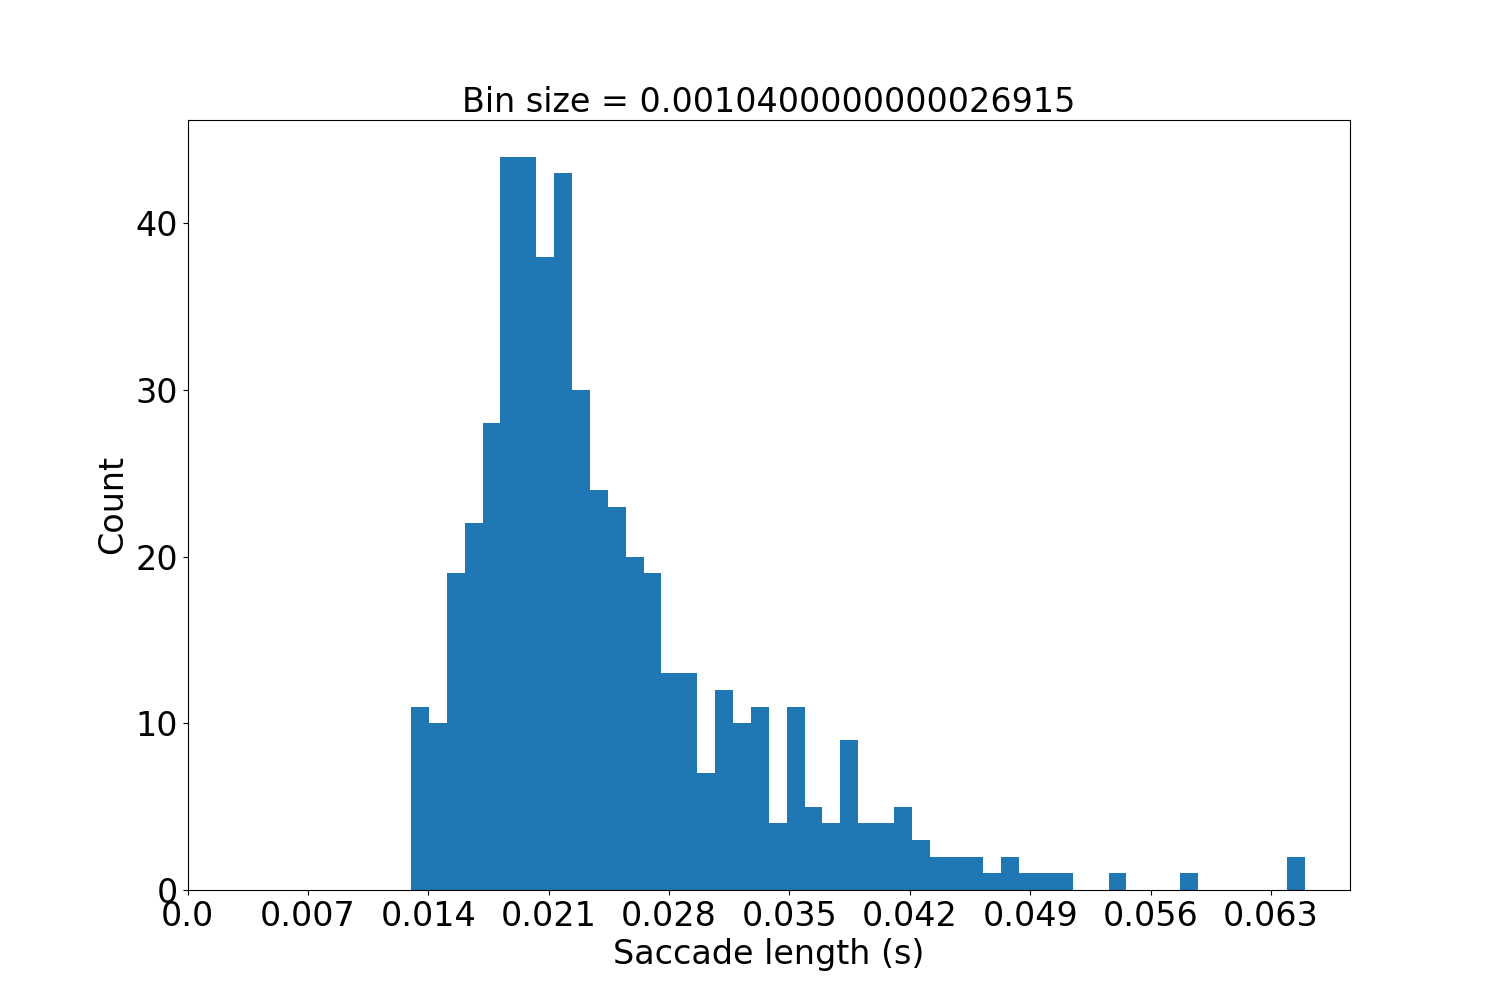

In [110]:
plt.figure(figsize=(15,10))
sac_lengths = mysess.saccade_offset_times - mysess.saccade_onset_times
sac_lengths = np.delete(sac_lengths, np.where(sac_lengths > 0.2))
(n,bins, patches) = plt.hist(sac_lengths, bins=50)
plt.xticks(np.arange(0,0.07,0.007),np.arange(0,0.07,0.007))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.title('Bin size = {}'.format(np.diff(bins)[0]), fontsize=24)
plt.xlabel('Saccade length (s)', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.savefig('../data/plots/Mirza-saccade_length_hist.png')
plt.savefig('../data/plots/Mirza-saccade_length_hist.svg')

<IPython.core.display.Javascript object>


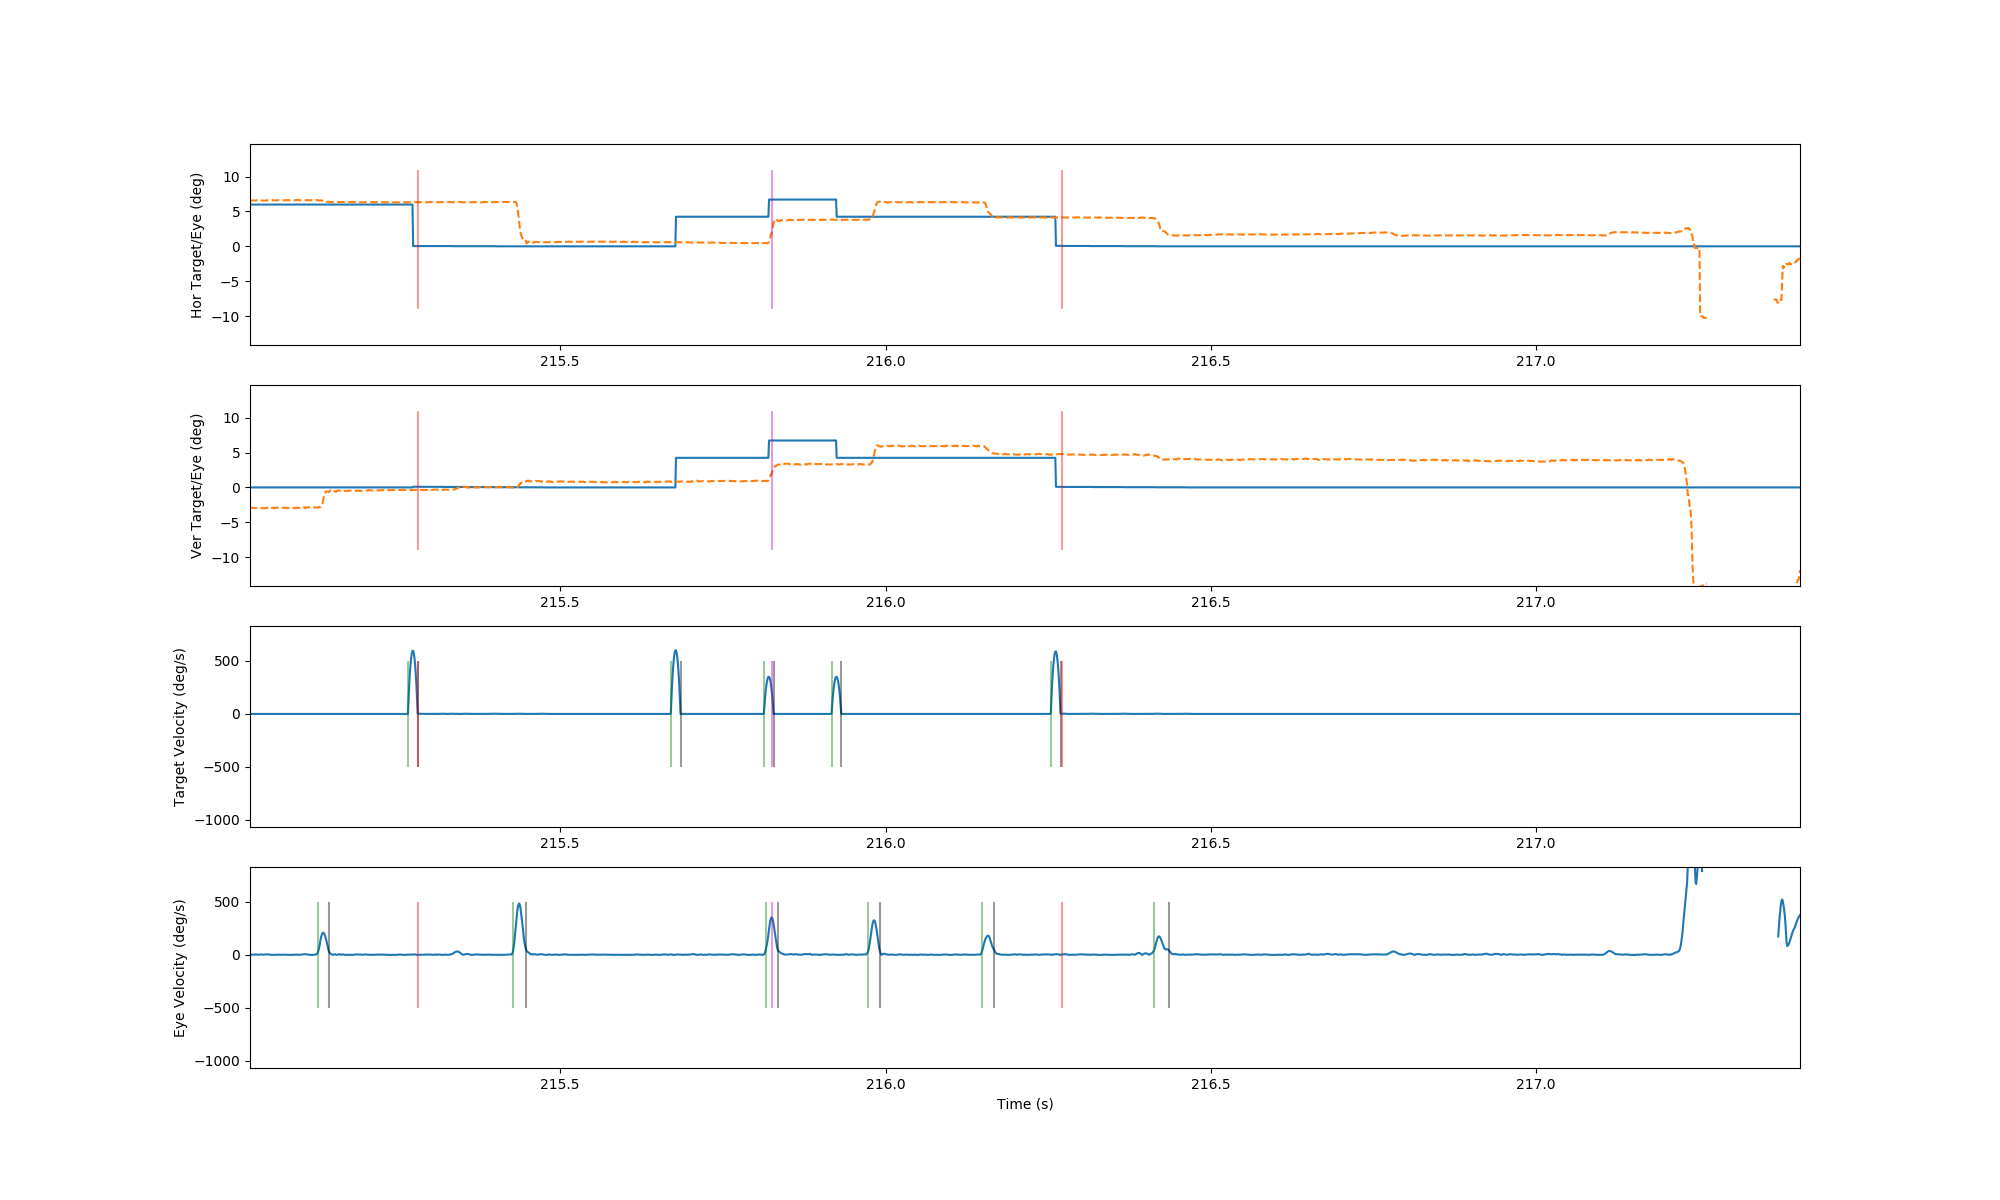

In [87]:
import gc
gc.collect()

plt.figure(figsize=(20,12))
ax1 = plt.subplot(411)
plt.eventplot(trial_start_times, linelengths=20, colors='r', zorder=10, alpha = 0.4)
plt.plot(mysess.t_HT, mysess.HT)
plt.plot(mysess.t_HT, mysess.HE, '--')
h = plt.ylabel('Hor Target/Eye (deg)')
plt.eventplot(dwell_start_times, linelengths=20, colors='m', zorder=10, alpha = 0.4)

# h.set_rotation(-45)
plt.subplot(412, sharex=ax1, sharey=ax1)
plt.plot(mysess.t_VT, mysess.VT)
plt.plot(mysess.t_VT, mysess.VE, '--')
plt.ylabel('Ver Target/Eye (deg)')
plt.eventplot(trial_start_times, linelengths=20, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(dwell_start_times, linelengths=20, colors='m', zorder=10, alpha = 0.4)

ax3 = plt.subplot(413, sharex=ax1)
plt.plot(mysess.t_VT, mysess.T_v_filtered)
plt.ylabel('Target Velocity (deg/s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(mysess.t_VT[mysess.target_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
# plt.eventplot(t_VT[mysess.target_onsets[iss_targets_successful_trials]],linelengths=1000, colors='r', zorder=10, alpha = 1)
plt.eventplot(mysess.t_VT[mysess.target_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)
# plt.eventplot(mysess.target_offset_times[non_iss_target_jumps_with_successfull_following_iss_tj],linelengths=5000, colors='m', zorder=10, alpha = 0.9)
# plt.eventplot(deliver_reward_times,linelengths=5000, colors='b', zorder=10, alpha = 0.4)
plt.eventplot(trial_start_times, linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(dwell_start_times, linelengths=1000, colors='m', zorder=10, alpha = 0.4)

ax4 = plt.subplot(414, sharex=ax1, sharey=ax3)
plt.plot(mysess.t_VE, mysess.E_v_filtered)
plt.ylabel('Eye Velocity (deg/s)')
plt.xlabel('Time (s)')
# plt.eventplot(t_VE[rising], linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(mysess.t_VE[mysess.saccade_onsets],linelengths=1000, colors='g', zorder=10, alpha = 0.4)
plt.eventplot(mysess.t_VE[mysess.saccade_offsets],linelengths=1000, colors='k', zorder=10, alpha = 0.4)
plt.eventplot(trial_start_times, linelengths=1000, colors='r', zorder=10, alpha = 0.4)
plt.eventplot(dwell_start_times, linelengths=1000, colors='m', zorder=10, alpha = 0.4)
plt.show()


In [11]:
str_target_fixation_times = [te.state_start_time_str_target_fixation for te in trialevents if hasattr(te, 'state_start_time_str_target_fixation')]
str_target_fixation_times = np.squeeze(np.hstack(str_target_fixation_times))

ValueError: need at least one array to concatenate

In [8]:
target_presentation_time = [te.state_start_time_cue_target_present for te in trialevents if hasattr(te, 'state_start_time_cue_target_present')]
target_presentation_time = np.squeeze(np.hstack(target_presentation_time))

NameError: name 'trialevents' is not defined

In [9]:
iti_times = [te.state_start_time_iti for te in trialevents if hasattr(te, 'state_start_time_iti')]
iti_times = np.squeeze(np.hstack(iti_times))

NameError: name 'trialevents' is not defined

In [186]:
target_pursuit_start_times =  [te.state_start_time_str_target_pursuit for te in trialevents if hasattr(te, 'state_start_time_str_target_pursuit')]
target_pursuit_start_times = np.squeeze(np.hstack(target_pursuit_start_times))

In [143]:
end_target_fixation_times = end_target_fixation_times - el_t[0]
el_t = el_t - el_t[0]

<IPython.core.display.Javascript object>


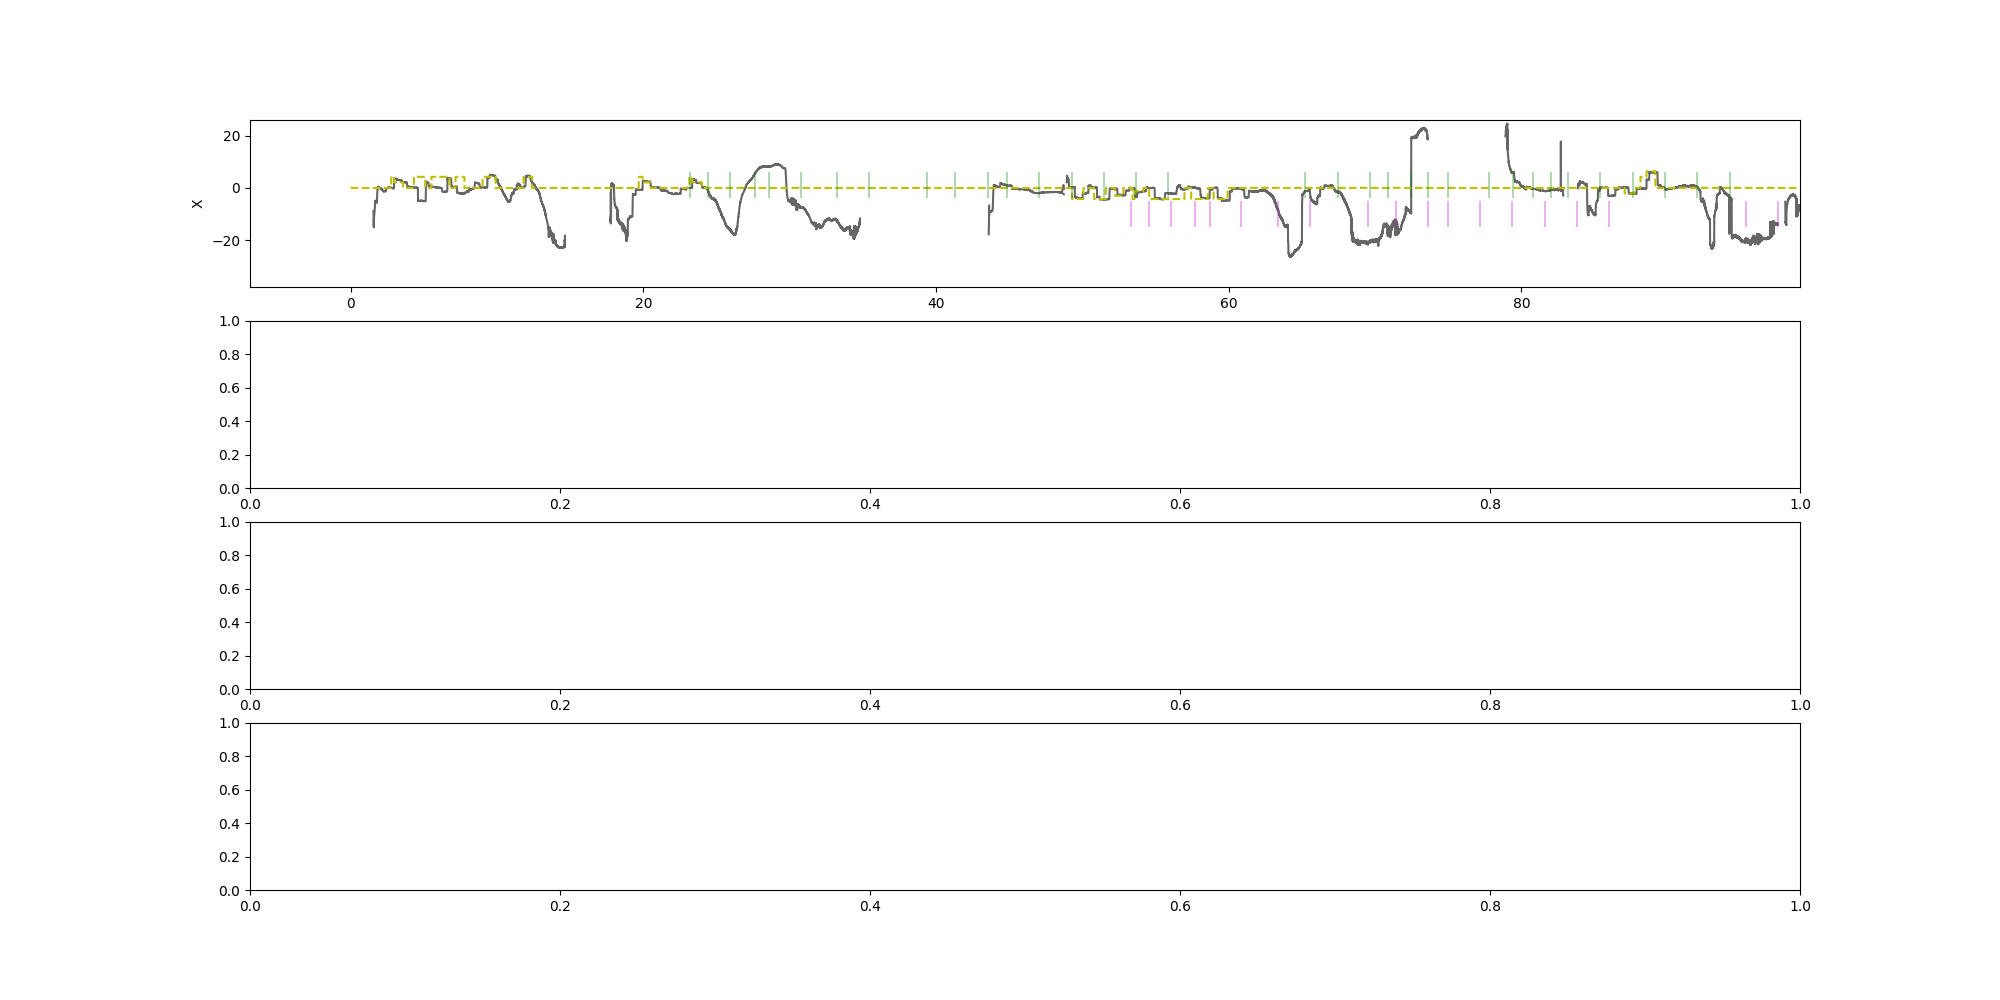

Text(0, 0.5, 'X')

In [198]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, gridspec_kw={'height_ratios': [1,1,1,1]}, figsize=(20,10), sharex=False)

ax0_l1 = ax0.plot(el_t, eye_x ,color='k', alpha=0.6)
ax0.eventplot(str_target_fixation_times, linelengths=10 , zorder=10, colors='g', alpha=0.3)
# ax0.eventplot(iti_times, linelengths=10 , zorder=10, colors='r', alpha=0.3)
# ax0.eventplot(net_events_prim[:,0]/Fs, linelengths=10 , lineoffsets=-10,zorder=10, colors='m', alpha=0.3)
ax0.eventplot(sync_events, linelengths=10 , lineoffsets=-10,zorder=10, colors='m', alpha=0.3)

ax0_l2 = ax0.plot(el_t, target_x , '--',color='y', alpha=1)
ax0.set_ylabel('X')

# ax1.plot(el_t, eye_y ,color='k', alpha=0.6)
# ax1.plot(el_t, target_y , '--',color='m', alpha=0.6)
# ax1.set_ylabel('Y')

# ax2.plot(el_t, eye ,color='k', alpha=0.6)
# ax2.plot(el_t, target , '--',color='m', alpha=0.6)
# ax2.set_ylabel('Magnitude')
# plt.eventplot(events_pursuit, linelengths=10 , zorder=10, colors='r', alpha=0.3)

# ax1.plot(voltage_t, eye_OE_x_filtered, color='k', alpha=0.6)
# f.legend((ax0_l1[0], ax0_l2[0]), ('Eye' , 'Target'), 'upper center')


In [145]:

with open(messages_fname, 'r') as f:
    file_content = f.readlines()
Fs = float(file_content[1].split('@')[-1][0:-3])
time0 = int(file_content[1].split(' ')[0])
net_events_prim = np.array([[l.split(' ')[0], l.split(' ')[1][1:]] for l in file_content if len(l.split(' ')) == 2 and 'P' in l.split(' ')[-1]]).astype(np.int)
net_events_corr = np.array([[l.split(' ')[0], l.split(' ')[1][1:]] for l in file_content if len(l.split(' ')) == 2 and 'C' in l.split(' ')[-1]]).astype(np.int)
net_events_prim[:,0] = net_events_prim[:,0] - time0
net_events_corr[:,0] = net_events_corr[:,0] - time0
directions_prim, counts_prim = np.unique(net_events_prim[:,1], return_counts=True)
directions_corr, counts_corr = np.unique(net_events_corr[:,1], return_counts=True)

In [146]:
import OpenEphys
file_content = OpenEphys.load(fname_OE_x)
Fs = float(file_content['header']['sampleRate'])
eye_OE_x = file_content['data']
file_content = OpenEphys.load(fname_OE_y)
eye_OE_y = file_content['data']


Loading continuous data...
Loading continuous data...


In [147]:
from kaveh.toolbox import butter_bandpass_filter

eye_OE_x_filtered = butter_bandpass_filter(eye_OE_x, 0.01, 600, Fs, order=2 )
eye_OE_y_filtered = butter_bandpass_filter(eye_OE_y, 0.01, 600, Fs, order=2 )


In [148]:
time_stamps = file_content['timestamps']

In [149]:
voltage_t = np.interp(np.arange(eye_OE_x.size), np.arange(0, eye_OE_x.size, eye_OE_x.size/time_stamps.size), time_stamps)

In [150]:
events_file = '../data/OpenEphys_data/2019-08-12/2019-08-12_16-04-50/all_channels.events'
events_content = OpenEphys.load(events_file)
event_t = events_content['timestamps']
eventId = events_content['eventId']
channelId = events_content['channel']

loading events...


In [190]:
channelId.shape

(10574,)

In [197]:
sync_events = event_t[np.where(np.logical_and(channelId == 3,eventId == 1))]
sync_events = sync_events - voltage_t[0]
voltage_t = voltage_t - voltage_t[0]
voltage_t = voltage_t/Fs
sync_events = sync_events/Fs

In [180]:
sync_events

array([  50.7444    ,   50.94693333,   52.95213333, ..., 1893.7933    ,
       1895.59656667, 1895.7937    ])

<IPython.core.display.Javascript object>


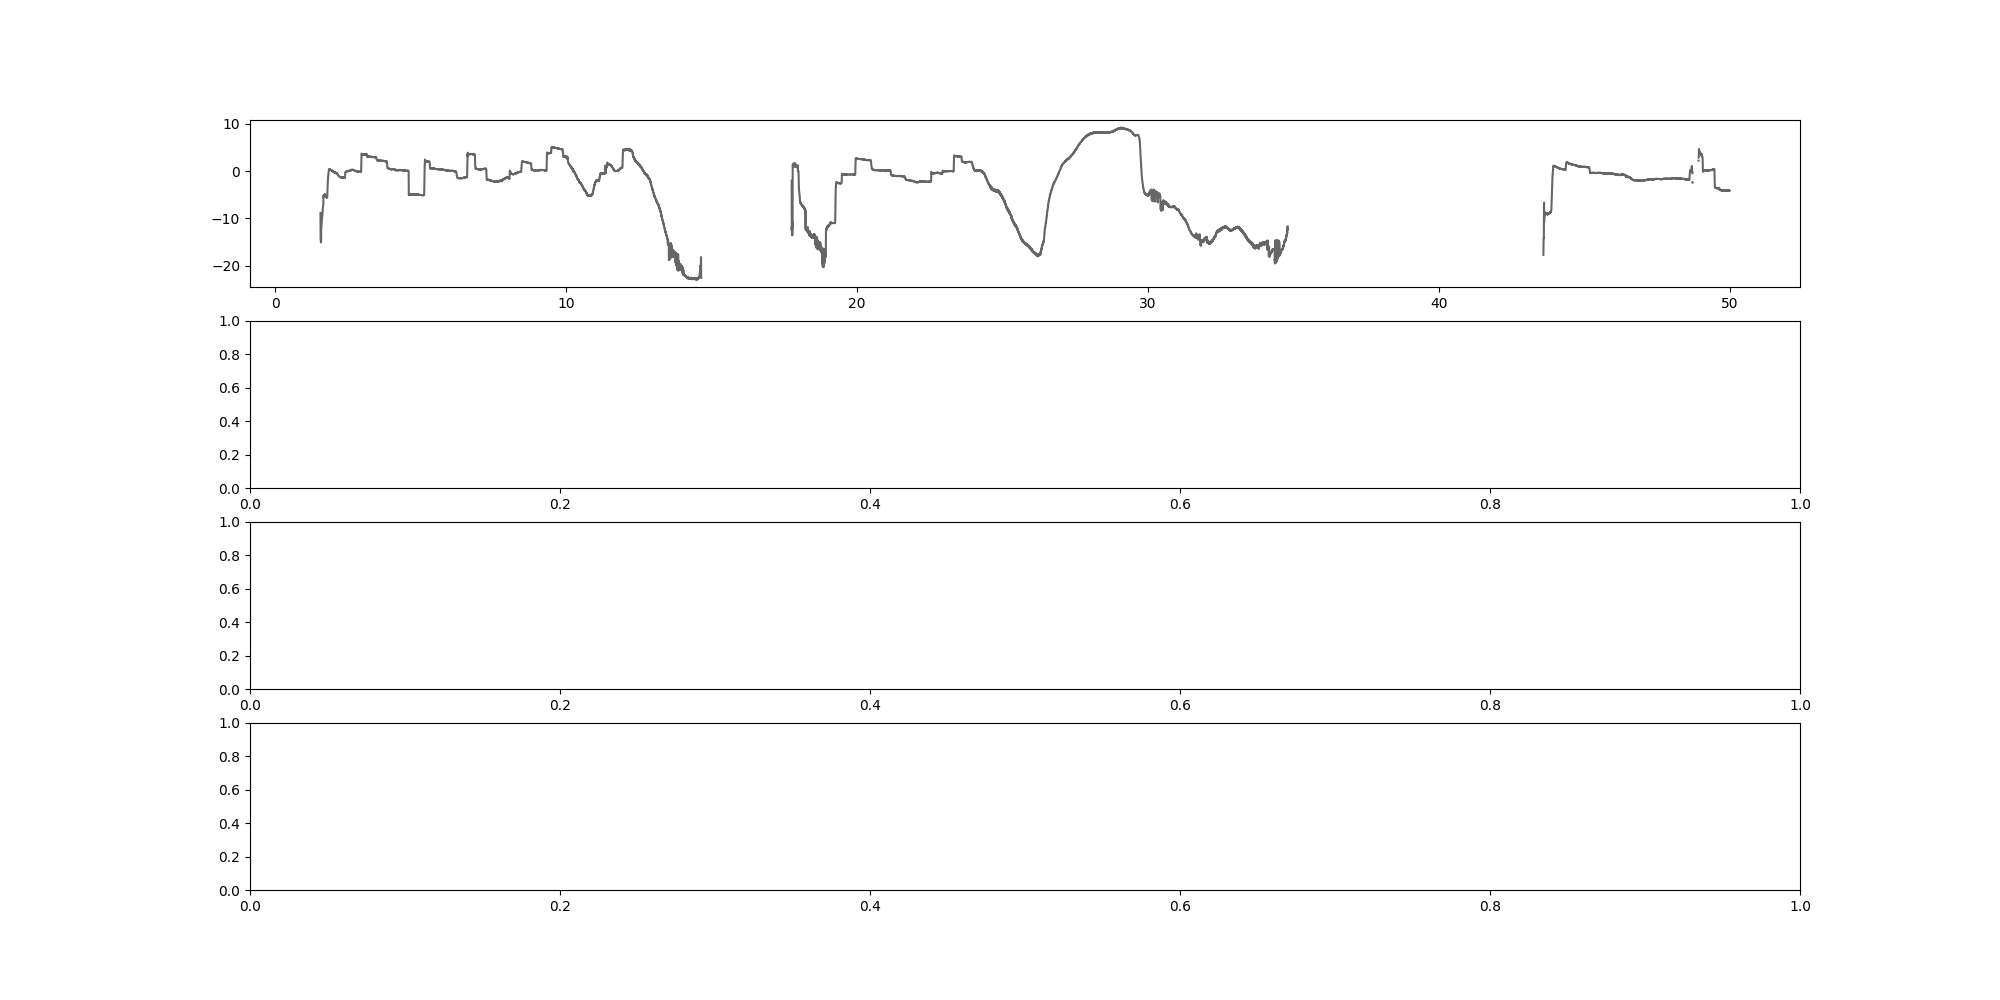

In [45]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, gridspec_kw={'height_ratios': [1,1,1,1]}, figsize=(20,10), sharex=False)
t_range = [0, 50]

ax0_l1 = ax0.plot(el_t[np.where(np.logical_and(el_t < t_range[1], el_t > t_range[0]))], eye_x[np.where(np.logical_and(el_t < t_range[1], el_t > t_range[0]))] ,color='k', alpha=0.6)

In [13]:
time_diff = net_events_prim[0,0]/Fs - el_t[np.argmax(np.diff(target)>4)] # get the time shift
el_t = el_t + time_diff # add the time shift to behavioral time
# Now the behavioral time is shifted to be aligned with the Open Ephys time


In [26]:
np.diff(t_range)

array([0.07])

<IPython.core.display.Javascript object>


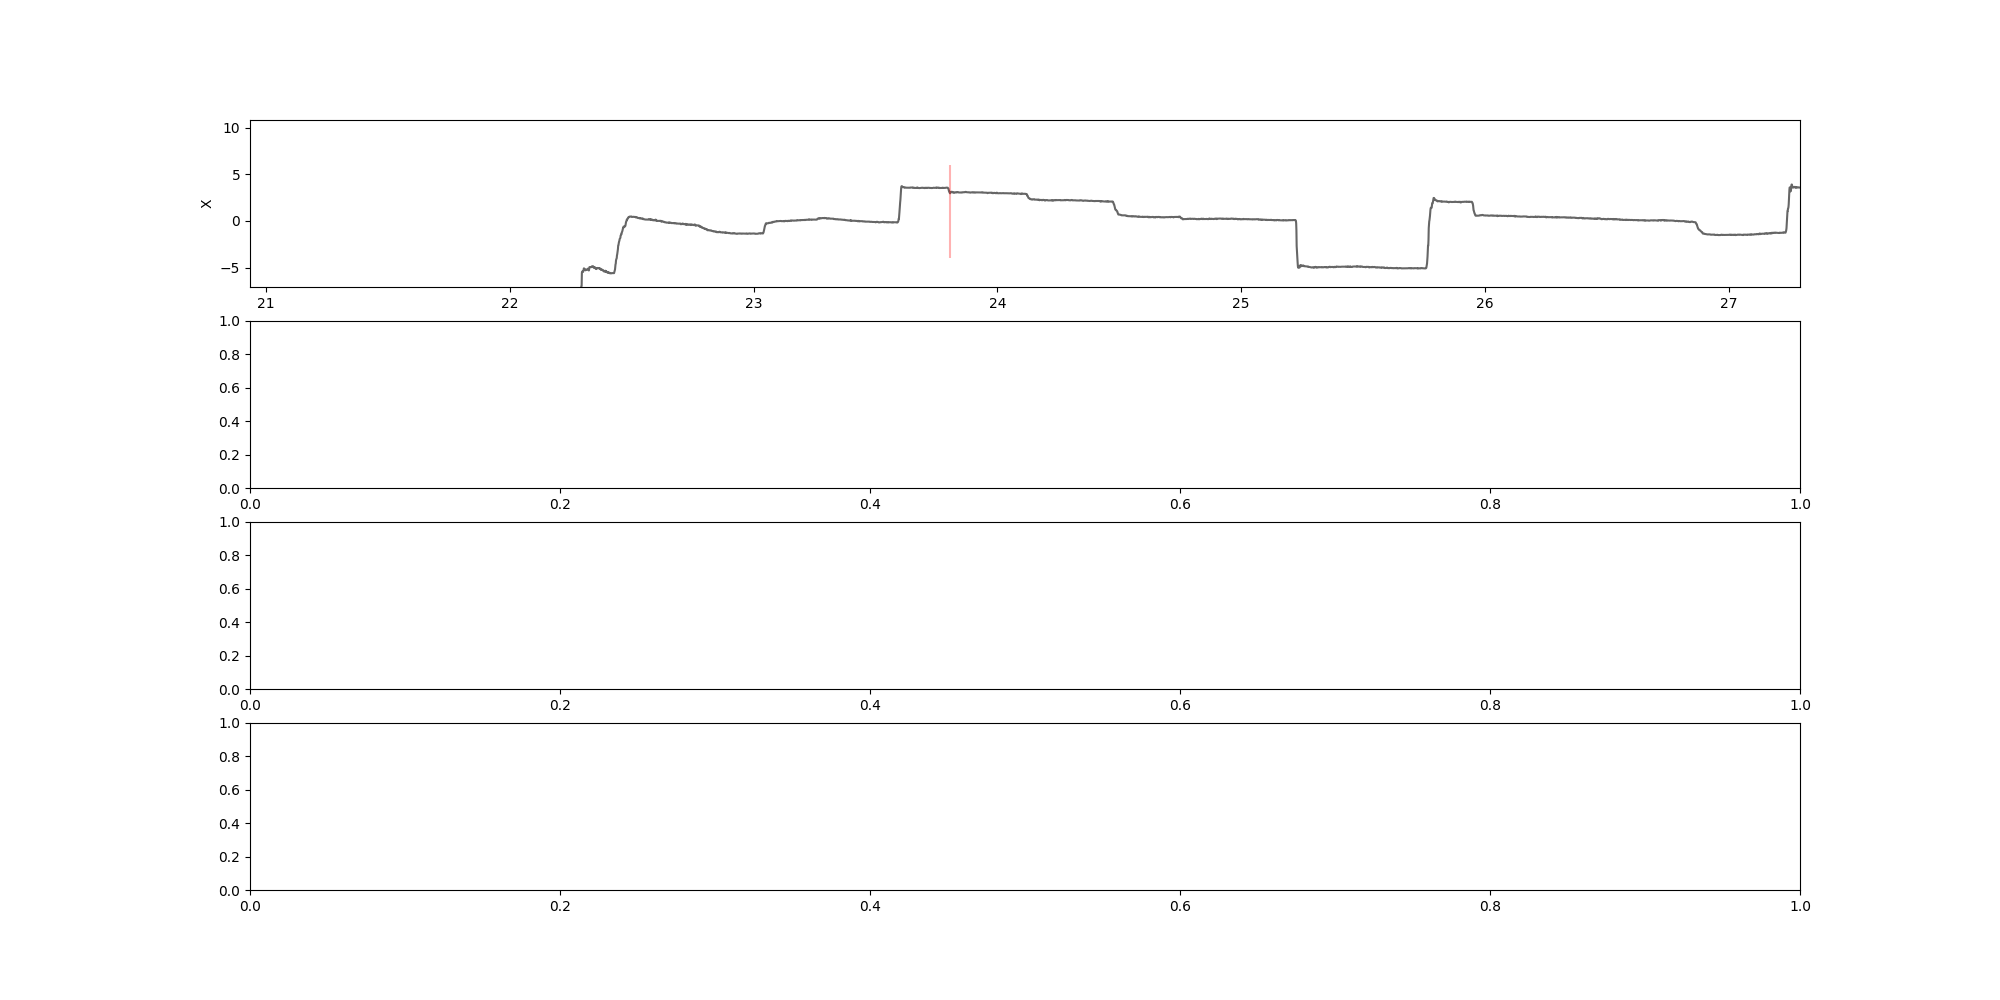

Text(0, 0.5, 'X')

In [135]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, gridspec_kw={'height_ratios': [1,1,1,1]}, figsize=(20,10), sharex=False)


ax0_l1 = ax0.plot(el_t, eye_x ,color='k', alpha=0.6)
ax0.eventplot(end_target_fixation_times, linelengths=10 , zorder=10, colors='r', alpha=0.3)
# ax0_l2 = ax0.plot(el_t, target_x , '--',color='m', alpha=0.6)
ax0.set_ylabel('X')

# ax1.plot(el_t, eye_y ,color='k', alpha=0.6)
# ax1.plot(el_t, target_y , '--',color='m', alpha=0.6)
# ax1.set_ylabel('Y')

# ax2.plot(el_t, eye ,color='k', alpha=0.6)
# ax2.plot(el_t, target , '--',color='m', alpha=0.6)
# ax2.set_ylabel('Magnitude')
# plt.eventplot(events_pursuit, linelengths=10 , zorder=10, colors='r', alpha=0.3)


# ax1.plot(voltage_t, eye_OE_x_filtered, color='k', alpha=0.6)
# f.legend((ax0_l1[0], ax0_l2[0]), ('Eye' , 'Target'), 'upper center')
